<a href="https://colab.research.google.com/github/SujitbMusale/Facial-Emotion-Recogniton/blob/main/Facial_Emotion_Recogniton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

PROJECT INTRODUCTION

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance. While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

PROBLEM STATEMENTS

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions.

This is a few shot learning live face emotion detection system. The model should be able to real-time identify the emotions of students in a live class

# Importing Liabaries ,Loading data and data cleaning

In [61]:
#importing all the necessary libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from tensorflow.keras.regularizers import l2

In [62]:
# mount a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:

Df_fear=pd.read_csv('/content/drive/MyDrive/almabetter/capston project/Deep Learning + ML Engg/fer2013.csv')

In [64]:
Df_fear.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [65]:
# lets check the total type of emotions present and there count in each type
print(len(Df_fear['emotion'].unique()))


7


In [66]:
print(Df_fear['emotion'].value_counts(ascending = False))

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


So total seven number of emotion are present in the data set. And 1 number is having very less count as compaired to others.

In [67]:
# lets check for null values.
print(Df_fear.isnull().sum())

emotion    0
pixels     0
Usage      0
dtype: int64


Here we can see that there is no null value is present in data.

# EDA

In [68]:
Df_fear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [69]:
Df_fear['pixels'].count()

35887

As from above you can say that the present data is in pixcel values there are total 96 pixcel present in each image of 48 x 48 size gray scalled resolutions.
and ther are total 35887 records of images present in data set

In [70]:
#types of emotions
emotions = ('anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral')

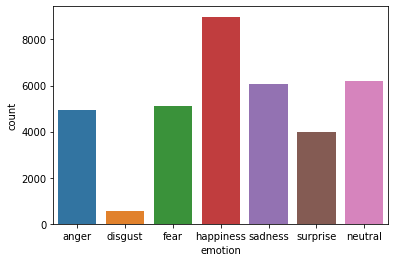

In [71]:
#bargraph for the emotions
sns.countplot(x=Df_fear['emotion']),
plt.xticks(range(7), emotions);


From above graph we can say that the number of happy people is large but disgust is small in number there is notable surprise people too.
sad and neutral near to equal.

# Data Transformation

In [72]:
# as we know the data is present in pixcel and its like flatten row 
# we need to reshape this data in to the gray image form
# gray image size is (48,48,1)
X =Df_fear['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))
X = np.stack(X, axis=0)
X.shape

(35887, 48, 48, 1)

We now converted the image to the 3D image and stack this image to the 4 th one to feed the images in batch to the model

In [73]:
# lets check the shape of lable thta is emotions
y = Df_fear['emotion']
y.shape

(35887,)

In [74]:
# Label encoding the emotions
LE = LabelEncoder()
img_labels = LE.fit_transform(y)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(35887, 7)

In [75]:
# lets normalize the data as neural network is high sensitive to non normalized datacheck the current image value
# just devide the data by the maximum number of data
X= X/np.max(X)

In [76]:
# lets cross check the normal data
print(f'maximum value of data is {np.max(X)}')
print(f'minimum value of data is {np.min(X)}')

maximum value of data is 1.0
minimum value of data is 0.0


Text(0.5, 1.0, 'sadness')

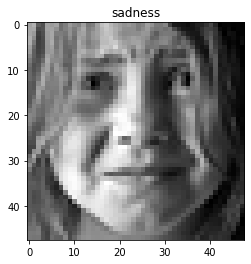

In [77]:
# lets display the random images from the data
#display a random image and it emotion
plt.imshow(X[2101].reshape((48,48)), cmap='gray')
plt.title(emotions[y[2101]])

In [78]:
#splitting the dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, img_labels, test_size=0.1, stratify=img_labels)

In [79]:
# lets check the shape of data
print('Training set : ', y_train.shape[0])
print('Test set : ', y_test.shape[0])

Training set :  32298
Test set :  3589


In [79]:
# lets use custom model 